In [ ]:
#Import Packages
import pandas as pd 
import numpy as np
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder


#Set pandas agar hanya menampilkan data dengan baris maksimal 30 dan maksimal kolom 30(agar mempercepat proses running)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [ ]:
#Baca Data
df = pd.read_csv("used_cars.csv")

In [ ]:
#Membatasi data hanya mobil dengan kisaran harga $1000 sampai $50000
df = df[df['price'] >= 1000]
df = df[df['price'] <= 50000]

#Membatasi data hanya mobil diatas tahun 1995 karna dibawah itu kebanyakan sudah sangat buruk kondisinya
df = df[df['year'] >= 1995]

EKSPLORASI DATA

In [ ]:
#Kolom-kolom yang ada pada data
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'vin', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long'],
      dtype='object')

<Figure size 7500x7500 with 0 Axes>

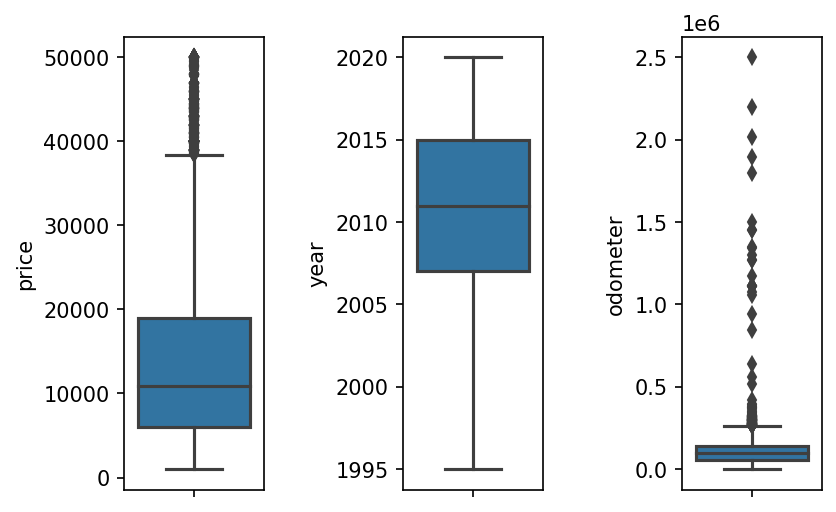

In [ ]:
#Boxplot
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(50, 50))
f, axes = plt.subplots(1, 3)
sns.boxplot(y=df["price"], ax=axes[0])
sns.boxplot(y=df["year"], ax=axes[1])
sns.boxplot(y=df["odometer"], ax=axes[2])
plt.subplots_adjust(wspace=1)

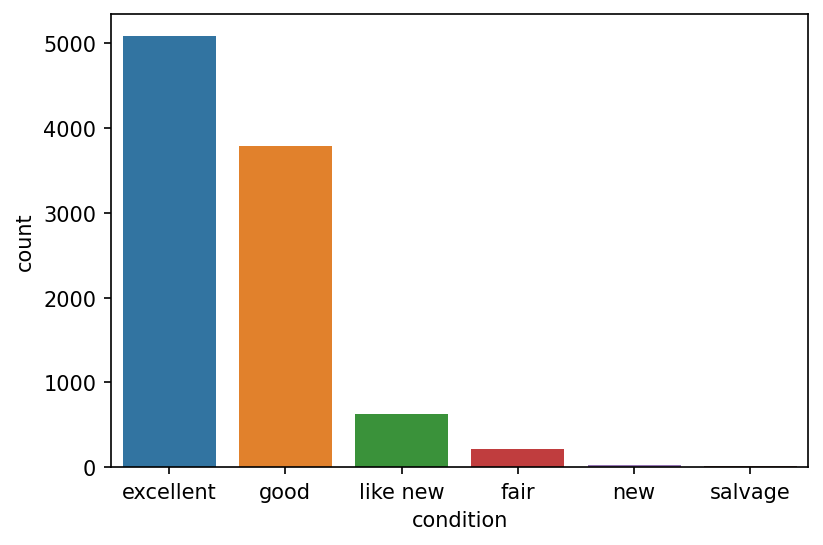

In [ ]:
#Persebaran Data
sns.countplot(df['condition'])

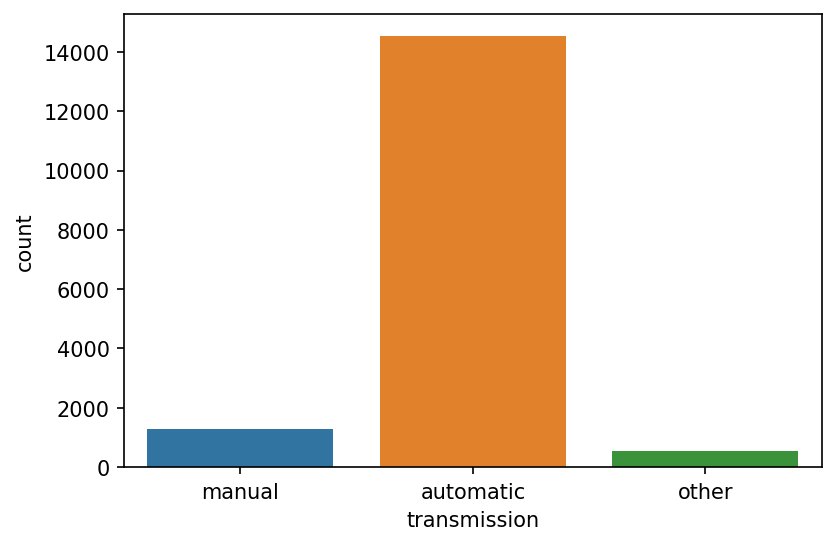

In [ ]:
sns.countplot(df['transmission'])

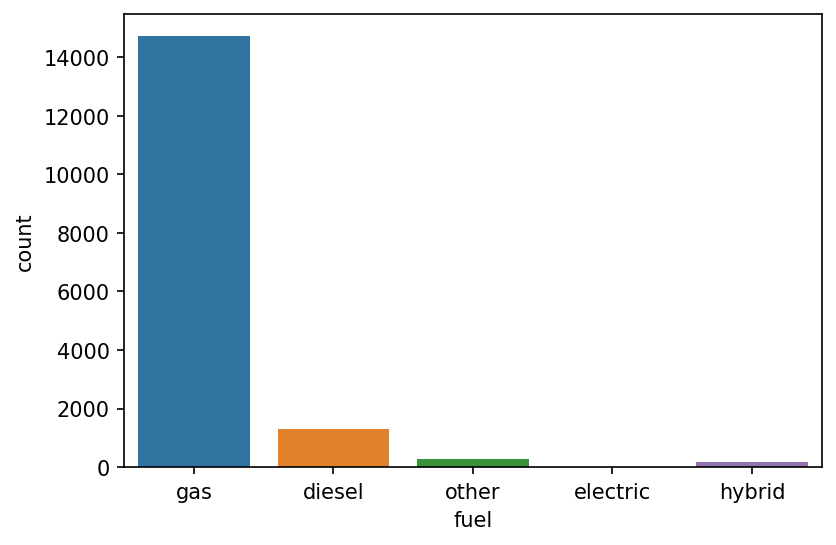

In [ ]:
sns.countplot(df['fuel'])

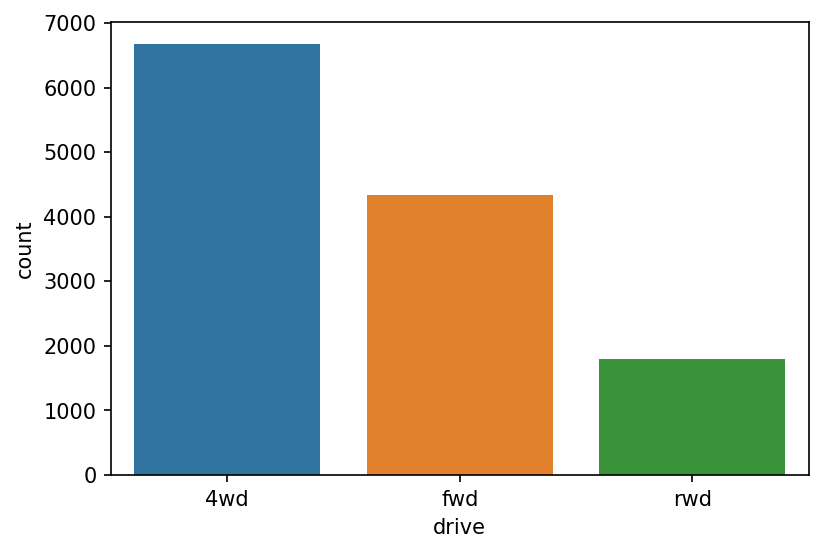

In [ ]:
sns.countplot(df['drive'])

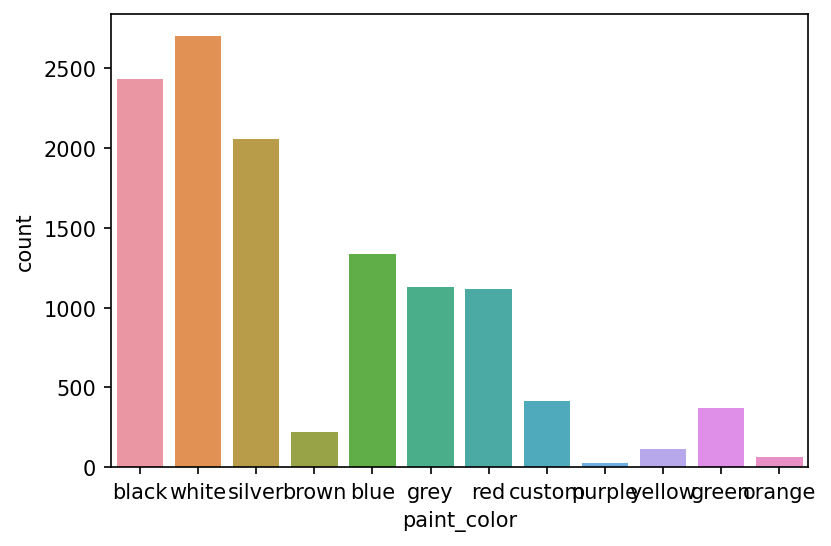

In [ ]:
sns.countplot(df['paint_color'])

In [ ]:
#Persebaran data dalam bentuk lain, karena apabila di visualisasi dengan grafik. susah untuk dibaca
print(df.groupby('price').size())
print(df.groupby('year').size())
print(df.groupby('manufacturer').size())
print(df.groupby('cylinders').size())
print(df.groupby('odometer').size())
print(df.groupby('type').size())

price
1000     55
1077      1
1100     13
1150      4
1195      1
         ..
49990     1
49995     2
49998     3
49999    14
50000     6
Length: 2086, dtype: int64
year
1995.0      61
1996.0      70
1997.0      97
1998.0     111
1999.0     159
2000.0     220
2001.0     264
2002.0     330
2003.0     460
2004.0     592
2005.0     655
2006.0     740
2007.0    1035
2008.0    1108
2009.0     741
2010.0     892
2011.0    1121
2012.0    1163
2013.0    1191
2014.0    1164
2015.0    1181
2016.0    1268
2017.0     947
2018.0     628
2019.0     337
2020.0       6
dtype: int64
manufacturer
acura          176
alfa-romeo       2
audi           193
bmw            544
buick          104
              ... 
saturn          47
subaru         651
toyota        1497
volkswagen     418
volvo          137
Length: 37, dtype: int64
cylinders
10 cylinders      59
12 cylinders       2
3 cylinders       11
4 cylinders     3759
5 cylinders      106
6 cylinders     3767
8 cylinders     2867
other            121
dt

PREPARASI DATA

In [ ]:
#Memasukkan feature untuk classification ke dalam df_clf
df_clf = df[['price','year','manufacturer','condition','cylinders','fuel','odometer','transmission','drive','type','paint_color']]
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16541 entries, 0 to 20000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         16541 non-null  int64  
 1   year          16541 non-null  float64
 2   manufacturer  16053 non-null  object 
 3   condition     9749 non-null   object 
 4   cylinders     10692 non-null  object 
 5   fuel          16496 non-null  object 
 6   odometer      14809 non-null  float64
 7   transmission  16362 non-null  object 
 8   drive         12805 non-null  object 
 9   type          13511 non-null  object 
 10  paint_color   11983 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
#Define tipe data int dan float yang akan digunakan untuk encoding
numerics = ['int64', 'float64']
categorical_columns = []
features = df_clf.columns.values.tolist()
for col in features:
    if df_clf[col].dtype in numerics: continue
    categorical_columns.append(col)
#Meng-encode data yang categorical
for col in categorical_columns:
    if col in df_clf.columns:
        le = LabelEncoder()
        le.fit(list(df_clf[col].astype(str).values))
        df_clf[col] = le.transform(list(df_clf[col].astype(str).values))

In [ ]:
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16541 entries, 0 to 20000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         16541 non-null  int64  
 1   year          16541 non-null  float64
 2   manufacturer  16541 non-null  int64  
 3   condition     16541 non-null  int64  
 4   cylinders     16541 non-null  int64  
 5   fuel          16541 non-null  int64  
 6   odometer      14809 non-null  float64
 7   transmission  16541 non-null  int64  
 8   drive         16541 non-null  int64  
 9   type          16541 non-null  int64  
 10  paint_color   16541 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.1 MB


In [ ]:
#Cleaning missing Values(karena dari hasil diatas feature odometer masih memiliki missing values)
df_clf = df_clf[df_clf['odometer'].notnull()]
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14809 entries, 0 to 20000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14809 non-null  int64  
 1   year          14809 non-null  float64
 2   manufacturer  14809 non-null  int64  
 3   condition     14809 non-null  int64  
 4   cylinders     14809 non-null  int64  
 5   fuel          14809 non-null  int64  
 6   odometer      14809 non-null  float64
 7   transmission  14809 non-null  int64  
 8   drive         14809 non-null  int64  
 9   type          14809 non-null  int64  
 10  paint_color   14809 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.4 MB


In [ ]:
#Mengelompokkan data pada year(1995-2000 = 1, 2000-2005 = 2, 2005-2010 = 3, dan 2010-2020 = 4)
def year_conv(year): 
    if year >= 1995 and year <= 2000: 
        return 1
    elif year >= 2000 and year <=2005: 
        return 2
    elif year >= 2005 and year <=2010: 
        return 3
    else:
        return 4
#Memasukkan dataframe ke fungsi untuk merubah kolom menjadi numerik
year = df_clf['year'].apply(year_conv)

#Memasukkan kolom hasil konversi ke dataframe
df_clf = df_clf.assign(year=year)

#Mengelompokkan data harga(1000-20000 = 1, 20000-30000 = 2, 30000-50000 = 3)
def price_conv(price): 
    if price >= 1000 and price <= 20000: 
        return 1
    elif price >= 20000 and price <=30000: 
        return 2
    else: 
        return 3
#Memasukkan dataframe ke fungsi untuk merubah kolom menjadi numerik
price = df_clf['price'].apply(price_conv)

#Memasukkan kolom hasil konversi ke dataframe
df_clf = df_clf.assign(price=price)



In [ ]:
#Unduh data
df_clf.to_csv("data_classification.csv", sep=';',index=True, encoding='utf-8')

In [ ]:
#Split data
# Import fungsi train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
df_feature = df_clf[['year','manufacturer','condition','cylinders','fuel','odometer','transmission','drive','type','paint_color']]
df_target = df_clf[['price']]
# 70% training dan 30% test. ini untuk eksperimen 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_feature, df_target, test_size=0.3,random_state=109) 
# 70% training dan 30% test. ini untuk eksperimen 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_feature, df_target, test_size=0.3,random_state=109) 

CLASSIFICATION

In [ ]:
#Classification dengan menggunakan Naive Bayes(Eksperimen 1)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
classifier1 = GaussianNB()

# Train the model using the training sets
classifier1.fit(X_train1, y_train1.values.ravel())

#Predict the response of test dataset
y_pred1 = classifier1.predict(X_test1)

In [ ]:
#Classification dengan menggunakan Neural Network(Eksperimen 2)
#Import Neural Network model
from sklearn.neural_network import MLPClassifier

#Buat Classifier Neural Network(dengan layer 3 baris yang memiliki 10 node disetiap layer dan iterasi 200 kali)
classifier2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=200)

#Train model menggunakan data training
classifier2.fit(X_train2, y_train2.values.ravel())

#Prediksi hasil training dengan test
y_pred2 = classifier2.predict(X_test2)

In [ ]:
#Import scikit-learn metrics untuk penghitungan akurasi
from sklearn import metrics

#Menunjukkan hasil akurasi
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test1, y_pred1))
print("Accuracy Neural Network:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy Naive Bayes: 0.7857303623677695
Accuracy Neural Network: 0.7855052892189962


CLUSTERING

In [ ]:
#Mempresiapkan data Clustering
df_cls = df[['year','price']]
#Membatasi data hanya mobil dengan kisaran harga $1000 sampai $50000
df_cls = df_cls[df_cls['price'] >= 1000]
df_cls = df_cls[df_cls['price'] <= 50000]

#Membatasi data hanya mobil diatas tahun 1995 karna dibawah itu kebanyakan sudah sangat buruk kondisinya
df_cls = df_cls[df_cls['year'] >= 1995]

In [ ]:
#Unduh data
df_cls.to_csv("data_clustering.csv", sep=';',index=True, encoding='utf-8')

In [ ]:
#Clustering menggunakan K-Means (dengan centroid = 4)
k = 4 
centroids = {
    i+1: [np.random.randint(1995,2020), np.random.randint(1000,50000)]
    for i in range(k)
}

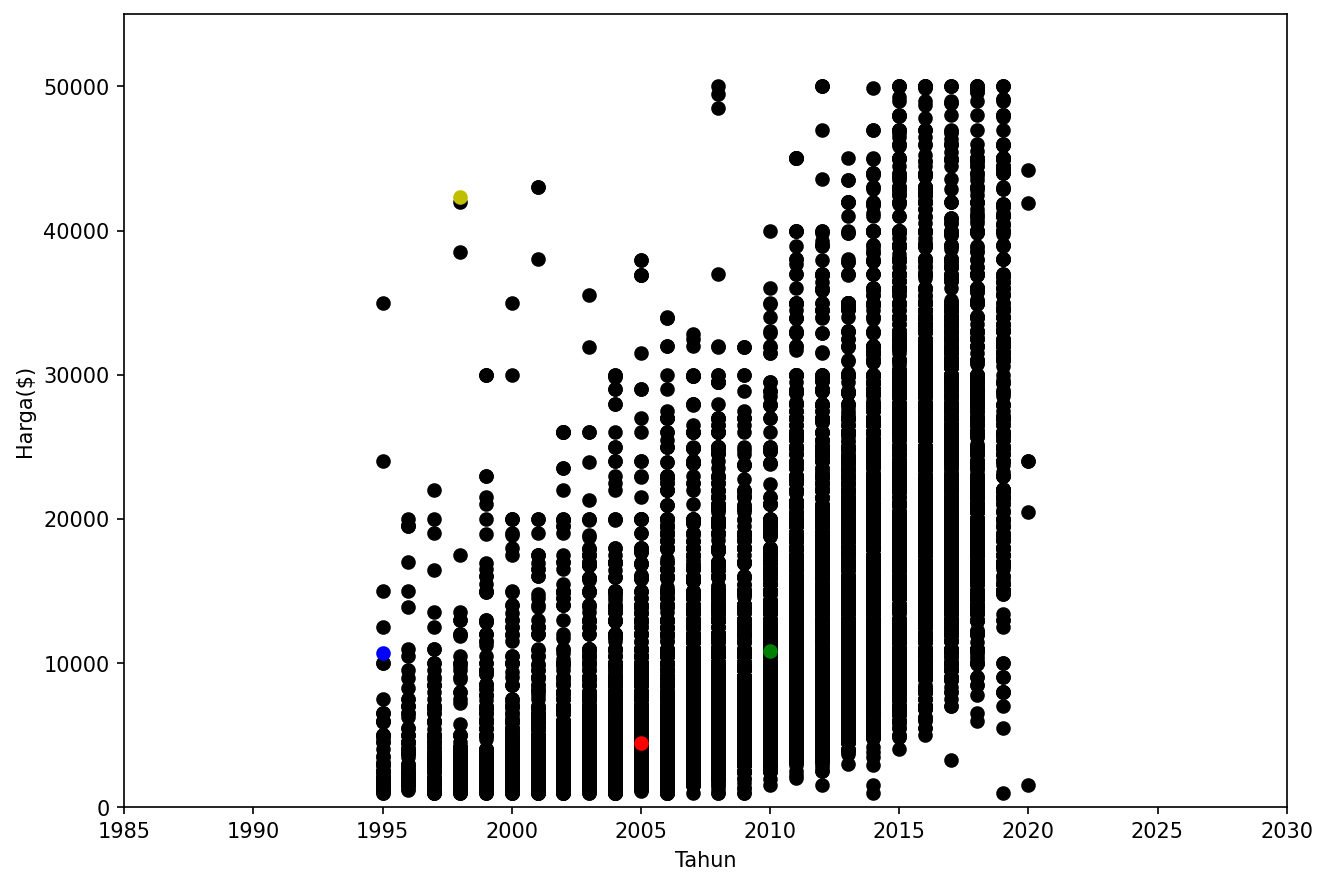

In [ ]:
#Visualisasi Letak centroid awal
fig = plt.figure(figsize=(10,7))
plt.scatter(df_cls['year'], df_cls['price'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
lab = {1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(1985, 2030)
plt.ylim(0, 55000)
plt.xlabel('Tahun')
plt.ylabel('Harga($)')
plt.show()

In [ ]:
#Tahap meng-assign data ke cluster yang sesuai berdasarkan euclidean distaance
def assignment(df_cls, centroid):
    for i in centroids.keys():
        df_cls['jarak dari centroid {}'.format(i)] = (
            np.sqrt(
                (df_cls['year'] - centroids[i][0]) ** 2
                + (df_cls['price'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['jarak dari centroid {}'.format(i) for i in centroid.keys()]
    df_cls['cluster'] = df_cls.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_cls['cluster'] = df_cls['cluster'].map(lambda x: int(x.lstrip('jarak dari centroid ')))
    df_cls['color'] = df_cls['cluster'].map(lambda x: colmap[x])
    return df_cls

df_cls = assignment(df_cls, centroids)
df_cls.head()

,year,price,jarak dari centroid 1,jarak dari centroid 2,jarak dari centroid 3,jarak dari centroid 4,cluster,color
0,2012.0,17899,13420.001826,7089.000282,7212.020036,24424.004012,2,g
2,2015.0,46463,41984.001191,35653.000351,35776.005590,4140.034903,4,y
4,2018.0,49999,45520.001856,39189.000817,39312.006728,7676.026055,4,y
5,2009.0,13999,9520.000840,3189.000157,3312.029589,28324.002136,2,g
6,2017.0,34500,30021.002398,23690.001034,23813.010163,7823.023073,4,y


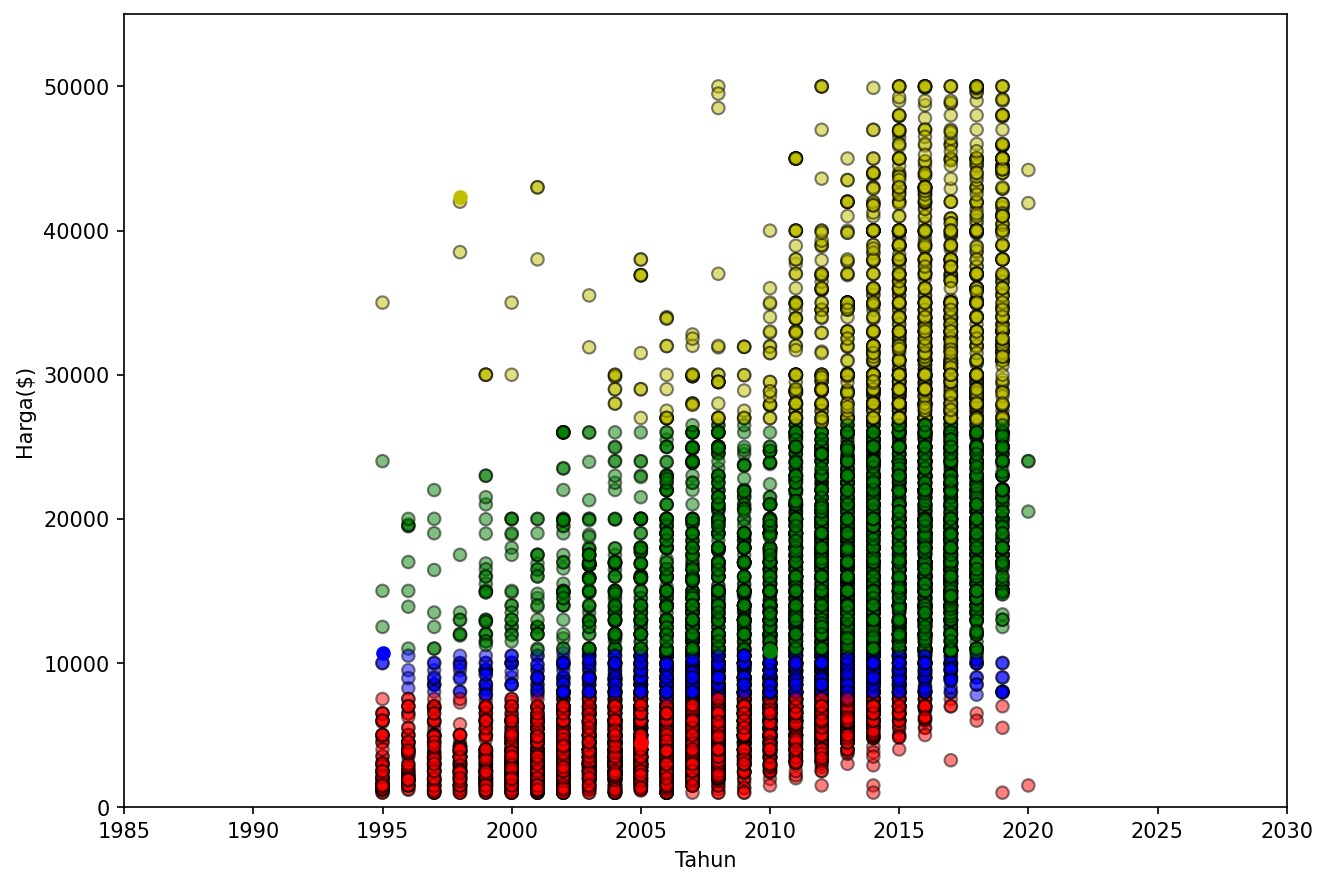

In [ ]:
#Visualisasi setelah data sudah di assign ke masing-masing data
#Centroid adalah yang tanpa outline hitam
fig = plt.figure(figsize=(10,7))
plt.scatter(df_cls['year'], df_cls['price'], color=df_cls['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(1985, 2030)
plt.ylim(0, 55000)
plt.xlabel('Tahun')
plt.ylabel('Harga($)')
plt.show()

In [ ]:
#Tahap memindahkan letak centroid ke tengah-tengah(rata-rata) persebaran data
old_centroids = copy.deepcopy(centroids)
def put_center(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_cls[df_cls['cluster'] == i]['year'])
        centroids[i][1] = np.mean(df_cls[df_cls['cluster'] == i]['price'])
    return k

centroids = put_center(centroids)

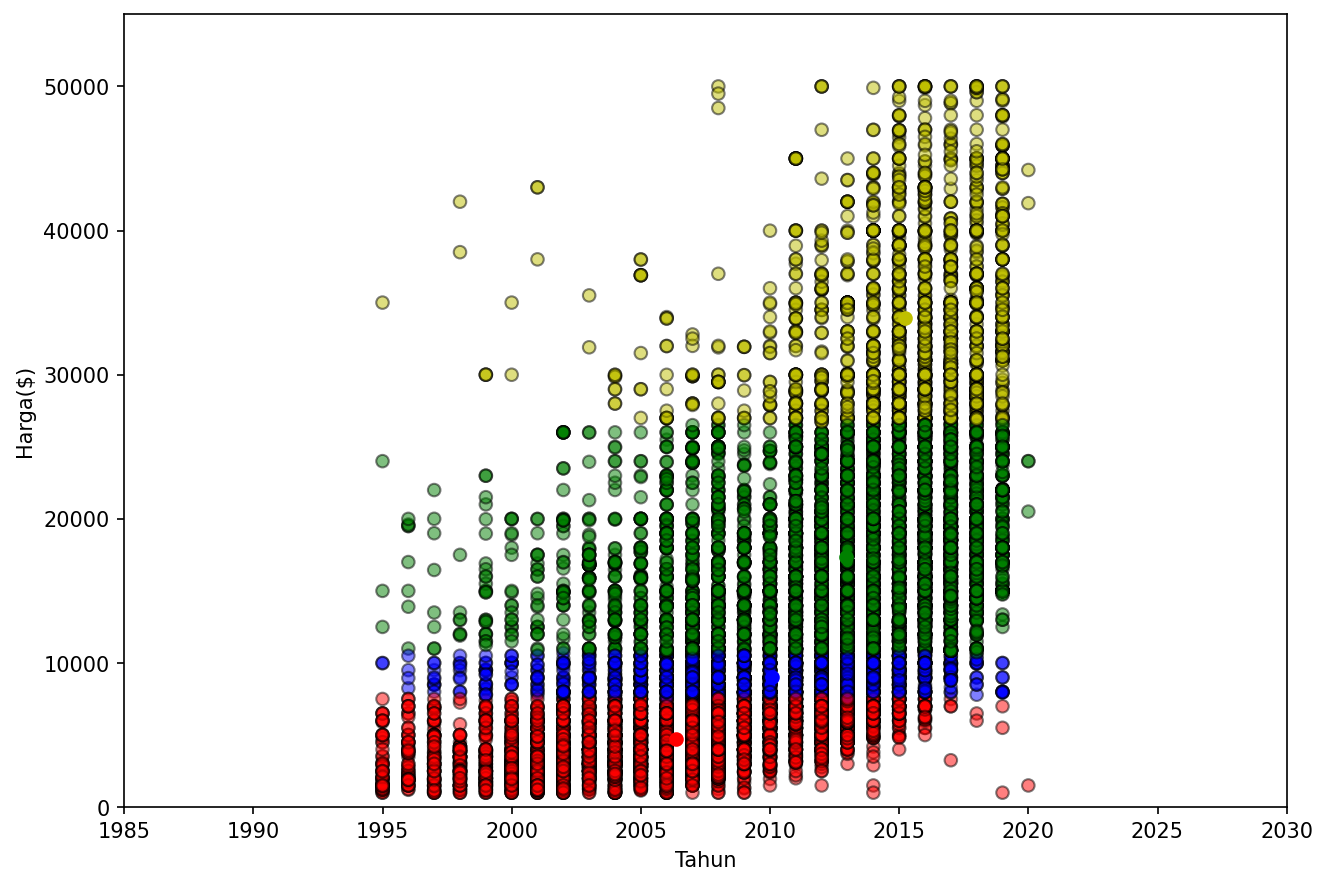

In [ ]:
#Visualisasi perpindahan centroid ke tengah-tengah(rata-rata) persebaran data
#Centroid adalah yang tanpa outline hitam
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
plt.scatter(df_cls['year'], df_cls['price'], color=df_cls['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(1985, 2030)
plt.ylim(0, 55000)
plt.xlabel('Tahun')
plt.ylabel('Harga($)')
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

In [ ]:
#Ulangi meng-assign data ke centroid-centroid nya
df_cls = assignment(df_cls, centroids)

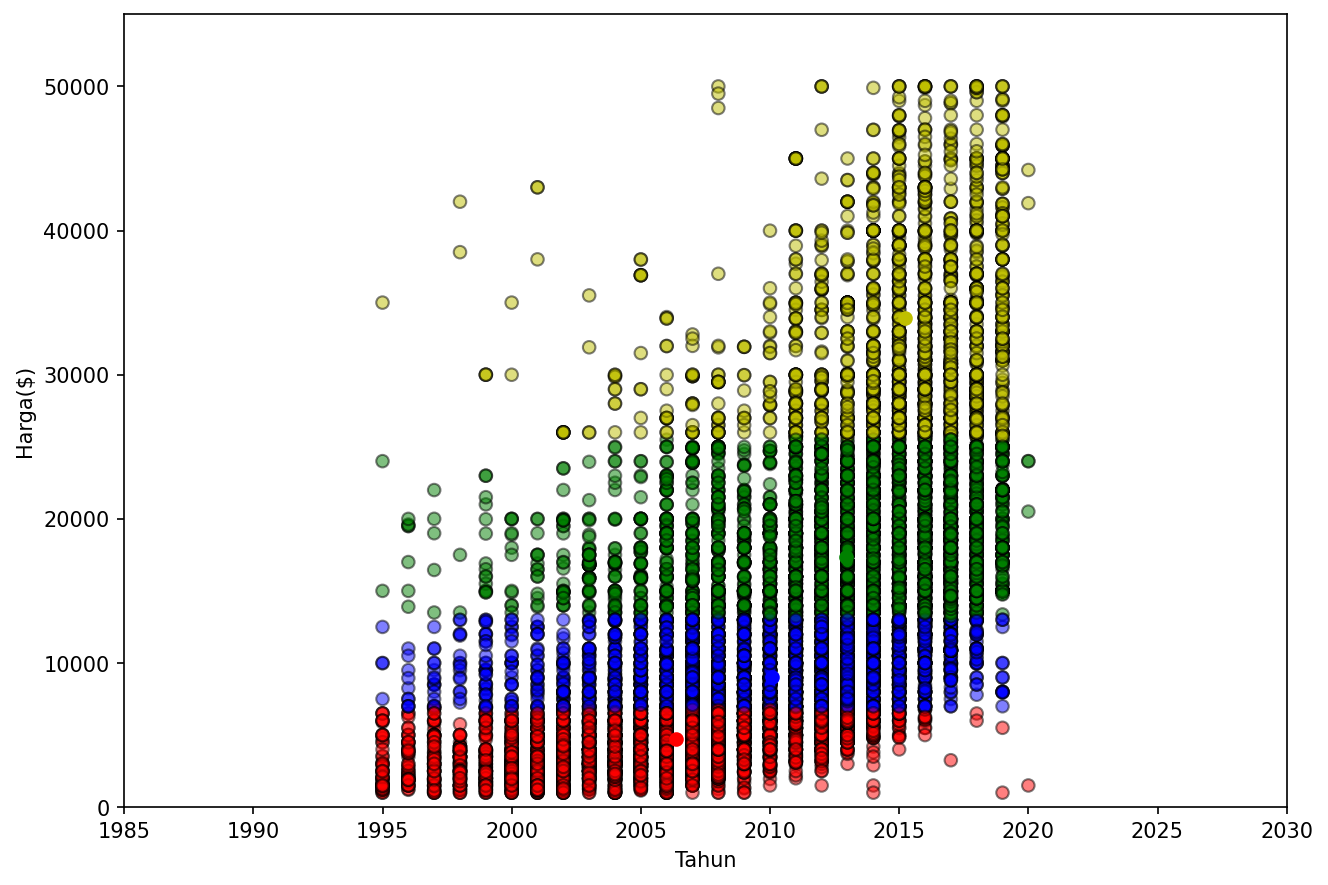

In [ ]:
#Visualisasi hasil assign data ke centroid
#Centroid adalah yang tanpa outline hitam
fig = plt.figure(figsize=(10,7))
plt.scatter(df_cls['year'], df_cls['price'], color=df_cls['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(1985, 2030)
plt.ylim(0, 55000)
plt.xlabel('Tahun')
plt.ylabel('Harga($)')
plt.show()

In [ ]:
#Ulangi terus hingga centroid tidak berpindah-pindah lagi
while True:
    closest_centroids = df_cls['cluster'].copy(deep=True)
    centroids = put_center(centroids)
    df_cls = assignment(df_cls, centroids)
    if closest_centroids.equals(df_cls['cluster']):
        break

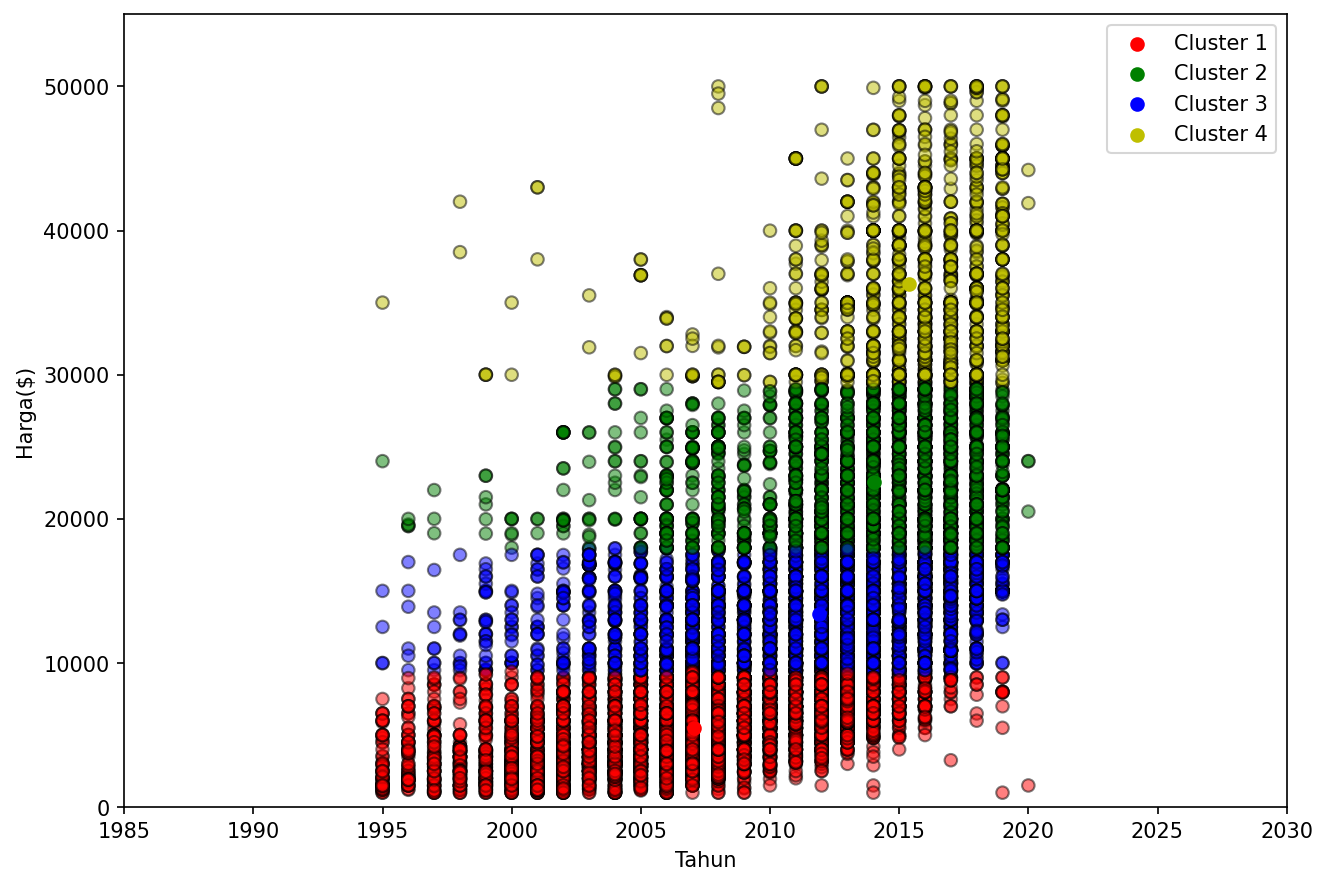

In [ ]:
#Visualisasi hasil akhir clustering
#Centroid adalah yang tanpa outline hitam
fig = plt.figure(figsize=(10,7))
plt.scatter(df_cls['year'], df_cls['price'], color=df_cls['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], label=lab[i])
plt.xlim(1985, 2030)
plt.ylim(0, 55000)
plt.xlabel('Tahun')
plt.ylabel('Harga($)')
plt.legend(loc='best')
plt.show()

In [ ]:
#Dataframe Hasil Clustering
df_cls

,year,price,jarak dari centroid 1,jarak dari centroid 2,jarak dari centroid 3,jarak dari centroid 4,cluster,color
0,2012.0,17899,12443.071808,4682.525078,4534.223291,18369.298795,3,b
2,2015.0,46463,41007.071597,23881.475385,33098.223436,10194.701522,4,y
4,2018.0,49999,44543.072172,27417.475652,36634.223798,13730.701766,4,y
5,2009.0,13999,8543.071049,8582.526114,634.229908,22269.299398,3,b
6,2017.0,34500,29044.072529,11918.475734,21135.223906,1768.299231,4,y
...,...,...,...,...,...,...,...,...
19995,2017.0,24999,19543.073354,2417.477179,11634.224409,11269.298602,2,g
19996,2016.0,49999,44543.071726,27417.475436,36634.223520,13730.701529,4,y
19997,2018.0,12127,6671.079789,10454.525385,1237.791754,24141.298627,3,b
19999,2017.0,14661,9205.076189,7920.525188,1296.233333,21607.298546,3,b
